In [73]:
import pandas as pd
import numpy as np 

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Car price prediction/CarPrice.csv')

In [75]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Preprocessing

In [76]:
df.shape

(205, 26)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [78]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Finding the Correlation Matrix

In [79]:
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

<ipython-input-79-aeed27ee170c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


## Plotting the correlation matrix

<ipython-input-80-9346c6b748a9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


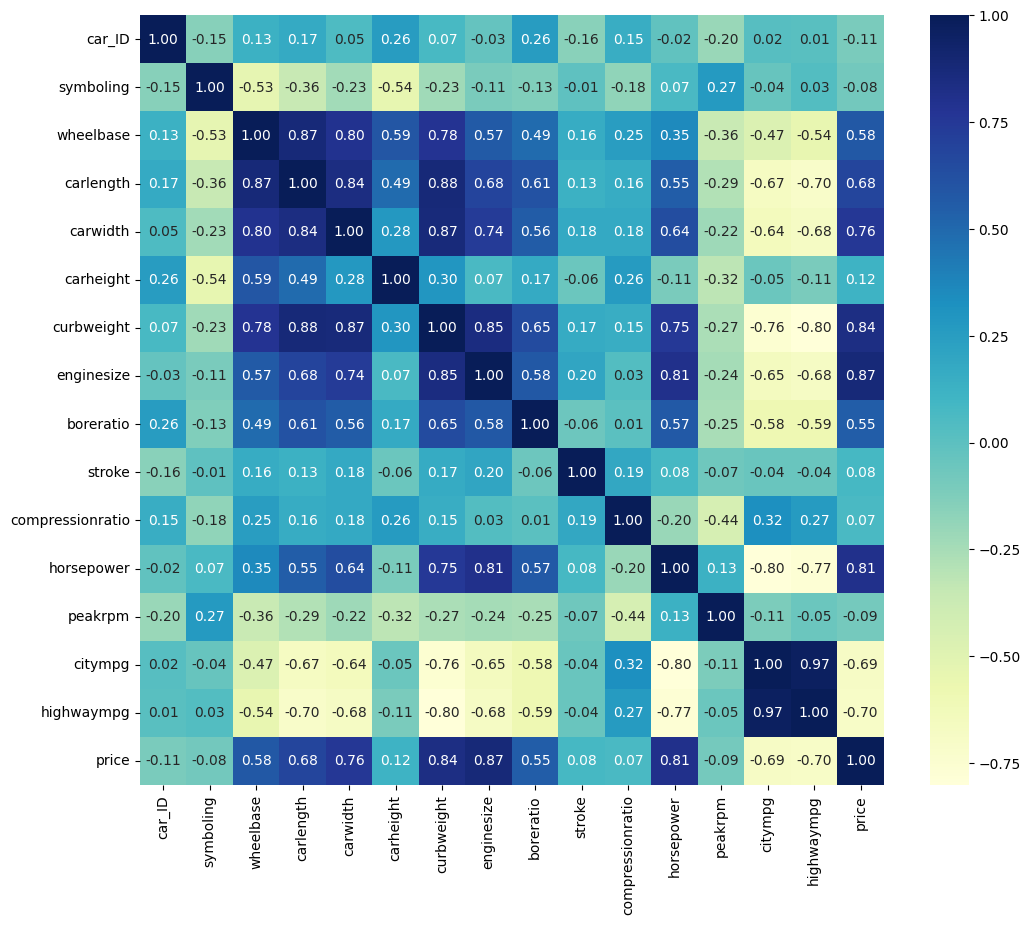

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating the correlation matrix
corr_matrix = df.corr()

# setting the figure size
plt.figure(figsize=(12, 10))

# heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt='.2f')

plt.show()


## Selecting Important features which are related to the price of the cars

In [81]:
# Selecting features with correlation coefficient >= 0.66 or <= -0.66
selected_feature_indices = np.where((corr_matrix['price'] >= 0.66) | (corr_matrix['price'] <= -0.66))[0]
selected_features = df.columns[selected_feature_indices]

# Printing selected features
print(selected_features)


Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'carwidth',
       'curbweight', 'enginetype', 'cylindernumber'],
      dtype='object')


## Final Selected Features

In [82]:
selected_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'carwidth',
       'curbweight', 'enginetype', 'cylindernumber','price']

In [83]:
final_df = df[selected_features]

In [84]:
final_df

,fueltype,aspiration,carbody,drivewheel,carwidth,curbweight,enginetype,cylindernumber,price
0,gas,std,convertible,rwd,64.1,2548,dohc,four,13495.0
1,gas,std,convertible,rwd,64.1,2548,dohc,four,16500.0
2,gas,std,hatchback,rwd,65.5,2823,ohcv,six,16500.0
3,gas,std,sedan,fwd,66.2,2337,ohc,four,13950.0
4,gas,std,sedan,4wd,66.4,2824,ohc,five,17450.0
...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,68.9,2952,ohc,four,16845.0
201,gas,turbo,sedan,rwd,68.8,3049,ohc,four,19045.0
202,gas,std,sedan,rwd,68.9,3012,ohcv,six,21485.0
203,diesel,turbo,sedan,rwd,68.9,3217,ohc,six,22470.0


In [85]:
print(final_df.fueltype.value_counts())
print(final_df.aspiration.value_counts())
print(final_df.carbody.value_counts())
print(final_df.drivewheel.value_counts())
print(final_df.enginetype.value_counts())
print(final_df.cylindernumber.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


## Replacing the object datatypes with the integer

In [86]:
final_df.replace({'fueltype':{'gas':0, 'diesel':1}},inplace = True)
final_df.replace({'aspiration':{'std':0, 'turbo':1}},inplace = True)
final_df.replace({'carbody':{'sedan':0, 'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace = True)
final_df.replace({'drivewheel':{'fwd':0, 'rwd':1,'4wd':2}},inplace = True)
final_df.replace({'enginetype':{'ohc':0, 'ohcf':1,'ohcv':2, 'dohc':3,'l':4, 'rotor':5,'dohcv':6}},inplace = True)
final_df.replace({'cylindernumber':{'four':0, 'six':1,'five':2, 'eight':3,'two':4, 'three':5,'twelve':6}},inplace = True)

<ipython-input-86-03fd2cf19328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace({'fueltype':{'gas':0, 'diesel':1}},inplace = True)
<ipython-input-86-03fd2cf19328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.replace({'aspiration':{'std':0, 'turbo':1}},inplace = True)
<ipython-input-86-03fd2cf19328>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [87]:
final_df

,fueltype,aspiration,carbody,drivewheel,carwidth,curbweight,enginetype,cylindernumber,price
0,0,0,4,1,64.1,2548,3,0,13495.0
1,0,0,4,1,64.1,2548,3,0,16500.0
2,0,0,1,1,65.5,2823,2,1,16500.0
3,0,0,0,0,66.2,2337,0,0,13950.0
4,0,0,0,2,66.4,2824,0,2,17450.0
...,...,...,...,...,...,...,...,...,...
200,0,0,0,1,68.9,2952,0,0,16845.0
201,0,1,0,1,68.8,3049,0,0,19045.0
202,0,0,0,1,68.9,3012,2,1,21485.0
203,1,1,0,1,68.9,3217,0,1,22470.0


# MODEL TRAINING and TESTING

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [89]:
X = final_df[['fueltype','aspiration','carbody','drivewheel','carwidth','curbweight','enginetype','cylindernumber']]
y = final_df['price']

In [90]:
X

,fueltype,aspiration,carbody,drivewheel,carwidth,curbweight,enginetype,cylindernumber
0,0,0,4,1,64.1,2548,3,0
1,0,0,4,1,64.1,2548,3,0
2,0,0,1,1,65.5,2823,2,1
3,0,0,0,0,66.2,2337,0,0
4,0,0,0,2,66.4,2824,0,2
...,...,...,...,...,...,...,...,...
200,0,0,0,1,68.9,2952,0,0
201,0,1,0,1,68.8,3049,0,0
202,0,0,0,1,68.9,3012,2,1
203,1,1,0,1,68.9,3217,0,1


In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [92]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.26)

In [93]:
print(train_X.shape)
print(test_X.shape)

(151, 8)
(54, 8)


## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
mse_dt = mean_squared_error(test_y, y_pred_dt)
accuracy_dt = 1 - (mse_dt / test_y.var())
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8499316276455697


## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(test_X)
mse_rf = mean_squared_error(test_y, y_pred_rf)
accuracy_rf = 1 - (mse_rf / test_y.var())
print("Random Forest Accuracy:", accuracy_rf)



Random Forest Accuracy: 0.8966072590622485


## Greadient Boosting Regressor

In [96]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(train_X, train_y)
y_pred_gb = gb.predict(test_X)
mse_gb = mean_squared_error(test_y, y_pred_gb)
accuracy_gb = 1 - (mse_gb / test_y.var())
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.9012288554253749


## X-Gradient Boost

In [97]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_X, train_y)

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(test_X)
# Calculate the mean squared error
mse = mean_squared_error(test_y, y_pred_xgb)

# Calculate the accuracy
accuracy = 1 - (mse / test_y.var())
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.8899899451708239


In [98]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

## Linear Regression

In [99]:
lr = LinearRegression()
lr.fit(train_X, train_y)
y_pred_lr = lr.predict(test_X)
accuracy_lr = lr.score(test_X, test_y)
print("Linear Regression Accuracy:", accuracy_lr)

Linear Regression Accuracy: 0.7446590085661107


## Lasso Regression

In [100]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_X, train_y)
y_pred_lasso = lasso.predict(test_X)
accuracy_lasso = lasso.score(test_X, test_y)
print("Lasso Regression Accuracy:", accuracy_lasso)

Lasso Regression Accuracy: 0.7446654720507333


## Ridge Regression

In [101]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_X, train_y)
y_pred_ridge = ridge.predict(test_X)
accuracy_ridge = ridge.score(test_X, test_y)
print("Ridge Regression Accuracy:", accuracy_ridge)

Ridge Regression Accuracy: 0.7446889504900451


## ElasticNet Regression

In [102]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(train_X, train_y)
y_pred_enet = enet.predict(test_X)
accuracy_enet = enet.score(test_X, test_y)
print("ElasticNet Regression Accuracy:", accuracy_enet)

ElasticNet Regression Accuracy: 0.745672593605561


## KNN Regression

In [103]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X, train_y)
y_pred_knn = knn.predict(test_X)
accuracy_knn = knn.score(test_X, test_y)
print("KNN Regression Accuracy:", accuracy_knn)

KNN Regression Accuracy: 0.7313210411300057


# SUMMARY TABLE

In [113]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Gradient Boosting','XG Boost','Linear Regression','Lasso Regression','Ridge Regression','Elastic-net Regression','KNN'],
    'Score': [0.8499,0.8966,0.9012,0.8899,0.7446,0.7446,0.7446,0.7456,0.7313]})

model_summary_df = results.sort_values(by='Score', ascending=False)
model_summary_df= model_summary_df.set_index('Score')
model_summary_df

,Model
Score,
0.9012,Gradient Boosting
0.8966,Random Forest
0.8899,XG Boost
0.8499,Decision Tree
0.7456,Elastic-net Regression
0.7446,Linear Regression
0.7446,Lasso Regression
0.7446,Ridge Regression
0.7313,KNN


## Saving the best model

In [110]:
from joblib import dump
dump(gb, 'gb_model_90%.joblib')

['gb_model_90%.joblib']

## Loading the saved best model

In [114]:
import os

print(os.getcwd())  # print current working directory
print(os.listdir())  # print contents of current directory


/content
['.config', 'drive', 'xgb_model.joblib', 'gb_model_90%.joblib', 'sample_data']


In [115]:
from joblib import load
loaded_model = load('gb_model_90%.joblib')

## Random testing on top 3 best models

In [120]:
import numpy as np

# features_list = [1, 1, 2, 2, 67, 2888, 5, 6]
features_list = [0, 1, 1, 1, 66.5, 2500, 0, 0]

features_arr = np.array(features_list).reshape(1, -1)

pred = loaded_model.predict(features_arr)
print(pred)


[10983.29891963]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [121]:
# features_list = [1, 1, 2, 2, 67, 2888, 5, 6]
features_list = [0, 1, 1, 1, 66.5, 2500, 0, 0]
features_arr = np.array(features_list).reshape(1, -1)

pred = rf.predict(features_arr)
print(pred)

[11363.925]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [122]:
# features_list = [1, 1, 2, 2, 67, 2888, 5, 6]
features_list = [0, 1, 1, 1, 66.5, 2500, 0, 0]
features_arr = np.array(features_list).reshape(1, -1)

pred = xgb_model.predict(features_arr)
print(pred)

[10433.121]


# User Reference Table

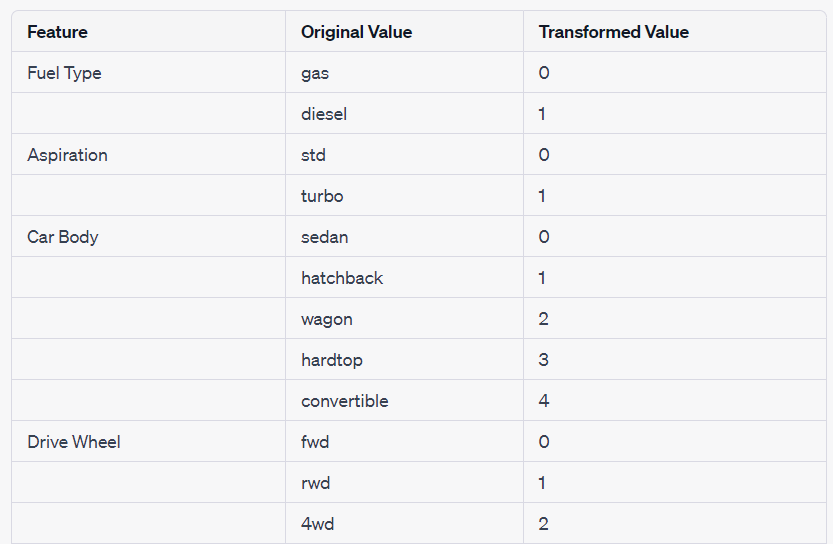

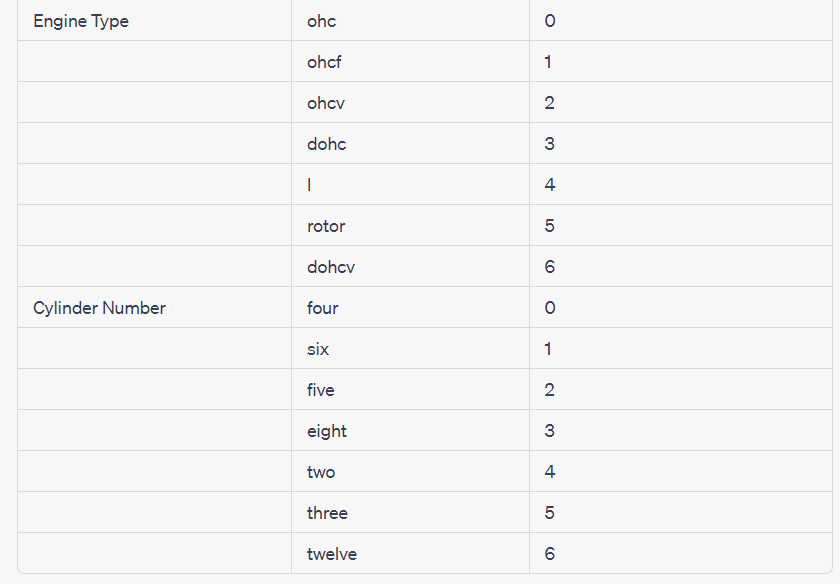

# User Space

In [139]:
print("!!! ENTER THE FOLLOWING CAR DETAILS TO GET THE ESTIMATED PRICE !!!")
print("1. FUEL TYPE :\n a. Gas : 0 \n b. Diesel : 1")
fuel = int(input("Enter your choice : "))

print("2. ASPIRATION :\n a. STD : 0 \n b. Turbo : 1")
aspiration = int(input("Enter your choice : "))

print("3. CAR BODY :\n a. Sedan : 0 \n b. Hatchback : 1 \n c. Wagon : 2 \n d. Hardtop : 3 \n e. Convertible : 4")
car_body = int(input("Enter your choice : "))

print("4. DRIVE WHEEL :\n a. Forward Wheel Drive : 0 \n b. Reverse Wheel Drive : 1 \n c. 4 Wheel Drive : 2")
drive_wheel = int(input("Enter your choice : "))

print("5. CAR WIDTH")
car_width = int(input("Enter your choice : "))

print("5. CURB WEIGHT")
curb_weight = int(input("Enter your choice : "))

print("3. ENGINE TYPE :\n a. ohc : 0 \n b. ohcf : 1 \n c. ohcv : 2 \n d. dohc : 3 \n e. l : 4 \n f. rotor : 5 \n g. dohcv : 6")
engine_type = int(input("Enter your choice : "))

print("3. CYLINDER NUMBERS :\n a. four : 0 \n b. six : 1 \n c. five : 2 \n d. eight : 3 \n e. two : 4 \n f. three : 5 \n g. twelve : 6")
cylinder_no = int(input("Enter your choice : "))


features_list = [fuel, aspiration, car_body, drive_wheel,car_width, curb_weight, engine_type, cylinder_no]

features_arr = np.array(features_list).reshape(1, -1)


pred = loaded_model.predict(features_arr)

print("THE ESTIMATED PRICE OF THE CAR AS PER YOUR SPECS IS : ")
print("${:.2f}".format(float(pred)))


!!! ENTER THE FOLLOWING CAR DETAILS TO GET THE ESTIMATED PRICE !!!
1. FUEL TYPE :
 a. Gas : 0 
 b. Diesel : 1
Enter your choice : 0
2. ASPIRATION :
 a. STD : 0 
 b. Turbo : 1
Enter your choice : 1
3. CAR BODY :
 a. Sedan : 0 
 b. Hatchback : 1 
 c. Wagon : 2 
 d. Hardtop : 3 
 e. Convertible : 4
Enter your choice : 4
4. DRIVE WHEEL :
 a. Forward Wheel Drive : 0 
 b. Reverse Wheel Drive : 1 
 c. 4 Wheel Drive : 2
Enter your choice : 2
5. CAR WIDTH
Enter your choice : 75
5. CURB WEIGHT
Enter your choice : 3000
3. ENGINE TYPE :
 a. ohc : 0 
 b. ohcf : 1 
 c. ohcv : 2 
 d. dohc : 3 
 e. l : 4 
 f. rotor : 5 
 g. dohcv : 6
Enter your choice : 4
3. CYLINDER NUMBERS :
 a. four : 0 
 b. six : 1 
 c. five : 2 
 d. eight : 3 
 e. two : 4 
 f. three : 5 
 g. twelve : 6
Enter your choice : 6
